In [21]:
import pandas as pd

# Load the CSV file into a DataFrame
npv_df = pd.read_csv(r'C:\Users\bougt\npv_2023_.csv')

# Display the first few rows of the DataFrame to get an overview
npv_df

,date,age,female,endPI,opioid1:0.5
0,2013/5/30,76,1,2.4,2.2405
1,11月12日,63,0,2.7,1.4040
2,11月14日,52,0,1.6,1.1000
3,11月26日,40,0,2.4,1.5700
4,12月3日,67,1,2.7,5.6700
5,12月5日,23,0,2.4,0.7450
6,12月10日,61,0,2.3,0.7650
7,12月12日,67,1,3.5,1.4200
8,12月17日,40,1,4.2,1.7500
9,2014/1/7,30,1,1.7,0.8570


In [18]:
len(npv_df)

30

In [2]:
import scipy.stats as stats

# Function to calculate mean and 95% confidence interval
def calculate_mean_and_ci(data):
    mean = data.mean()
    std_err = data.std() / (len(data) ** 0.5)
    ci_lower, ci_upper = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
    return mean, ci_lower, ci_upper

# Calculate for endPI and opioid1:0.5
endPI_mean, endPI_ci_lower, endPI_ci_upper = calculate_mean_and_ci(npv_df['endPI'])
opioid_mean, opioid_ci_lower, opioid_ci_upper = calculate_mean_and_ci(npv_df['opioid1:0.5'])

endPI_mean, endPI_ci_lower, endPI_ci_upper, opioid_mean, opioid_ci_lower, opioid_ci_upper

(2.62,
 2.2644823019896494,
 2.975517698010351,
 1.4894333333333332,
 1.142623073976829,
 1.8362435926898373)

# NPV 2.62 [2.26 to 2.98]

# Opioid 1.48 [1.14 to 1.84]

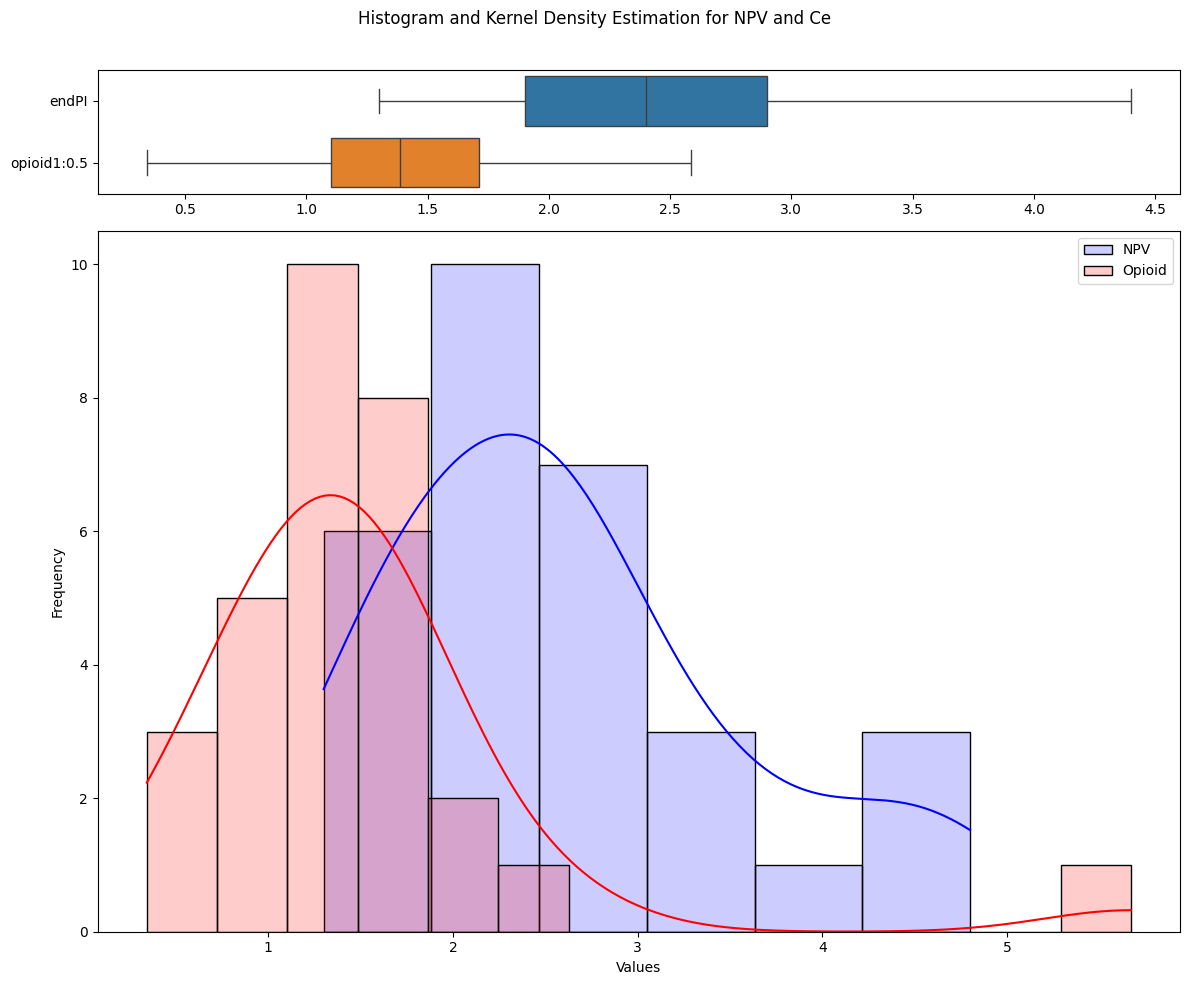

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={"height_ratios": (.15, .85)})

# Plotting the boxplots on top
sns.boxplot(data=npv_df[['endPI', 'opioid1:0.5']], orient='h', ax=axes[0], showfliers=False)
axes[0].set(xlabel="")

# Plotting the histograms and KDEs below
sns.histplot(data=npv_df, x="endPI", kde=True, ax=axes[1], color='blue', label='NPV', alpha=0.2)
sns.histplot(data=npv_df, x="opioid1:0.5", kde=True, ax=axes[1], color='red', label='Opioid', alpha=0.2)

axes[1].legend()
axes[1].set(ylabel="Frequency")
axes[1].set(xlabel="Values")
plt.suptitle("Histogram and Kernel Density Estimation for NPV and Ce")
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

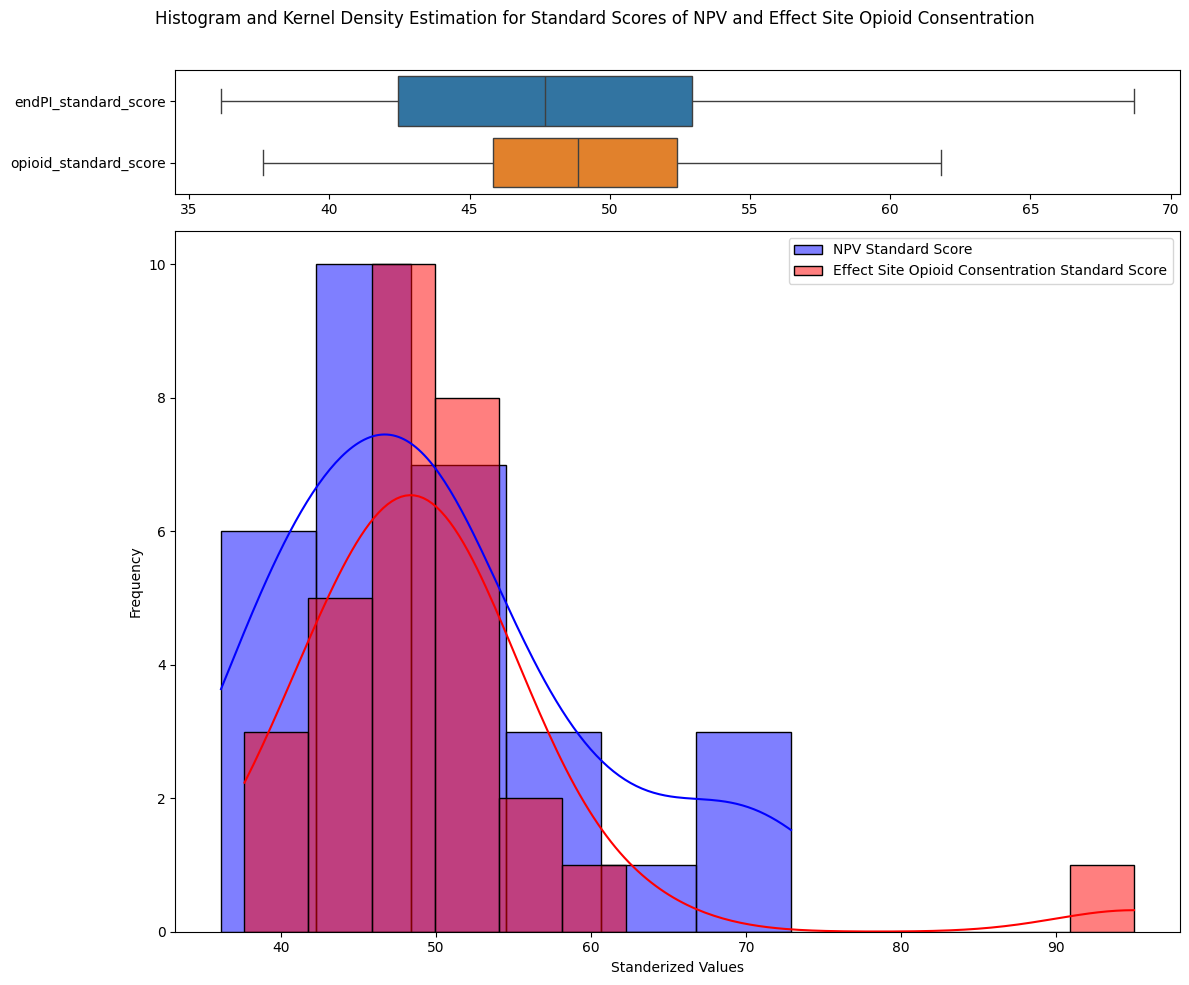

In [4]:
# Function to calculate standard score (偏差値)
def calculate_standard_score(data):
    return 50 + 10 * ((data - data.mean()) / data.std())

# Calculate standard scores for endPI and opioid1:0.5
npv_df['endPI_standard_score'] = calculate_standard_score(npv_df['endPI'])
npv_df['opioid_standard_score'] = calculate_standard_score(npv_df['opioid1:0.5'])

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={"height_ratios": (.15, .85)})

# Boxplots on top
sns.boxplot(data=npv_df[['endPI_standard_score', 'opioid_standard_score']], orient='h', ax=axes[0], showfliers=False)
axes[0].set(xlabel="")

# Histograms and KDEs below
sns.histplot(data=npv_df, x="endPI_standard_score", kde=True, ax=axes[1], color='blue', label='NPV Standard Score')
sns.histplot(data=npv_df, x="opioid_standard_score", kde=True, ax=axes[1], color='red', label='Effect Site Opioid Consentration Standard Score')

axes[1].legend()
axes[1].set(ylabel="Frequency")
axes[1].set(xlabel="Standerized Values")
plt.suptitle("Histogram and Kernel Density Estimation for Standard Scores of NPV and Effect Site Opioid Consentration")
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [5]:
# Function to calculate coefficient of variation and its 95% CI
def calculate_cv_and_ci(data):
    cv = data.std() / data.mean()
    ci_lower, ci_upper = stats.t.interval(0.95, len(data)-1, loc=cv, scale=data.std()/data.mean())
    return cv, ci_lower, ci_upper

# Calculate CV and CI for endPI and opioid1:0.5
endPI_cv, endPI_cv_ci_lower, endPI_cv_ci_upper = calculate_cv_and_ci(npv_df['endPI'])
opioid_cv, opioid_cv_ci_lower, opioid_cv_ci_upper = calculate_cv_and_ci(npv_df['opioid1:0.5'])

endPI_cv, endPI_cv_ci_lower, endPI_cv_ci_upper, opioid_cv, opioid_cv_ci_lower, opioid_cv_ci_upper

(0.36339461114548105,
 -0.3798308193605439,
 1.106620041651506,
 0.6235760348785199,
 -0.6517801557786053,
 1.8989322255356451)

# NPV CV 0.363 [-0.380 to 1.107]

# Opioid CV 0.624 [-0.652 to 1.899]

In [6]:
# F-test for equal variances
f_statistic, p_value = stats.f_oneway(npv_df['endPI'], npv_df['opioid1:0.5'])

f_statistic, p_value

(21.67503675915791, 1.9251938057087024e-05)

# F統計量21.68, p値1.93*10^-5

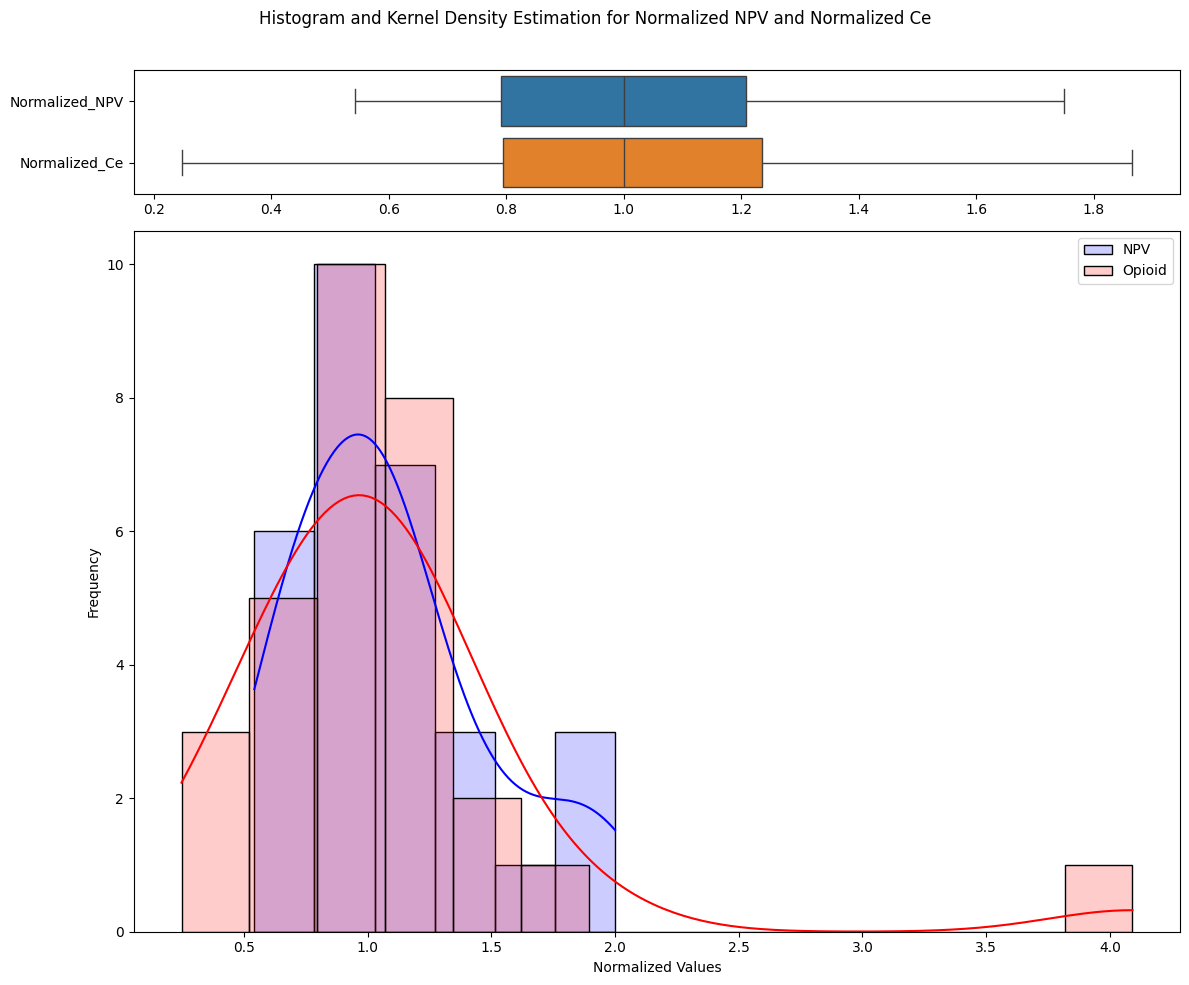

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 中央値で値を割る
npv_df['Normalized_NPV'] = npv_df['endPI'] / npv_df['endPI'].median()
npv_df['Normalized_Ce'] = npv_df['opioid1:0.5'] / npv_df['opioid1:0.5'].median()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={"height_ratios": (.15, .85)})

# 箱ひげ図を描画
sns.boxplot(data=npv_df[['Normalized_NPV', 'Normalized_Ce']], orient='h', ax=axes[0], showfliers=False)
axes[0].set(xlabel="")

# ヒストグラムとカーネル密度推定を描画
sns.histplot(data=npv_df, x="Normalized_NPV", kde=True, ax=axes[1], color='blue', label='NPV', alpha=0.2)
sns.histplot(data=npv_df, x="Normalized_Ce", kde=True, ax=axes[1], color='red', label='Opioid', alpha=0.2)

axes[1].legend()
axes[1].set(ylabel="Frequency")
axes[1].set(xlabel="Normalized Values")

plt.suptitle("Histogram and Kernel Density Estimation for Normalized NPV and Normalized Ce")
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# ↑NPVの方が集まりがよいという提示

C:\Users\bougt\AppData\Local\Temp\ipykernel_16624\2605661341.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set(yticklabels=['NPV', 'Ce'], xlabel="")


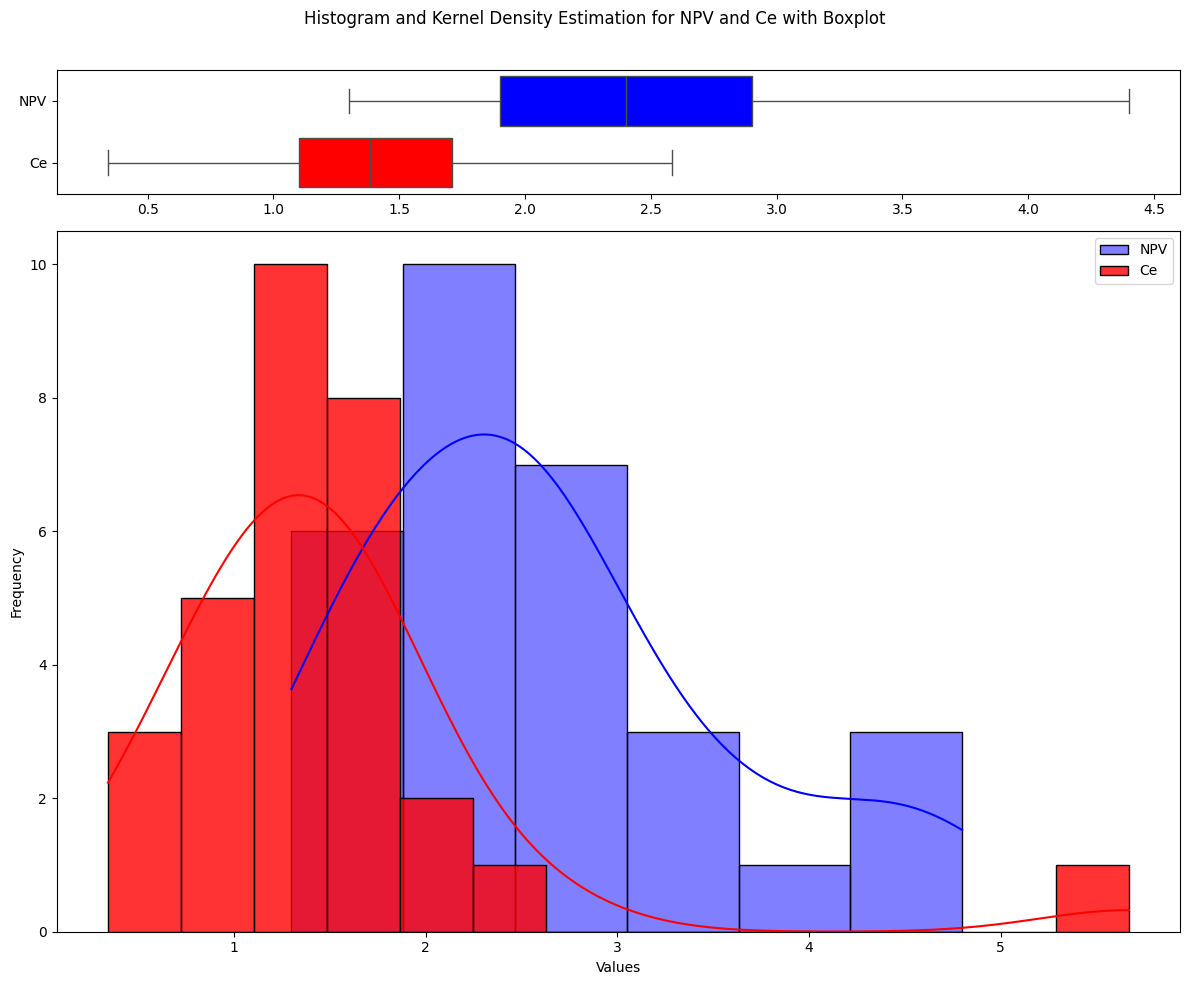

In [9]:
# Colors for endPI and opioid1:0.5 (Original values, not standard scores)
colors_original = {"endPI": "blue", "opioid1:0.5": "red"}

# Plotting with specified transparency for the original values
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={"height_ratios": (.15, .85)})

# Boxplots on top with specified colors and transparency
sns.boxplot(data=npv_df[['endPI', 'opioid1:0.5']], orient='h', ax=axes[0], palette=colors_original, showfliers=False, saturation=1.0)
axes[0].set(yticklabels=['NPV', 'Ce'], xlabel="")

# Histograms below with specified colors and transparency
sns.histplot(data=npv_df, x="endPI", kde=True, ax=axes[1], color=colors_original["endPI"], label='NPV', alpha=0.5)
sns.histplot(data=npv_df, x="opioid1:0.5", kde=True, ax=axes[1], color=colors_original["opioid1:0.5"], label='Ce', alpha=0.8)

axes[1].legend()
axes[1].set(xlabel="Values")
axes[1].set(ylabel="Frequency")
plt.suptitle("Histogram and Kernel Density Estimation for NPV and Ce with Boxplot")
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

C:\Users\bougt\AppData\Local\Temp\ipykernel_16624\412133345.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set(yticklabels=['NPV Standard Score', 'Effect Site Opioid Concentration Standard Score'], xlabel="")


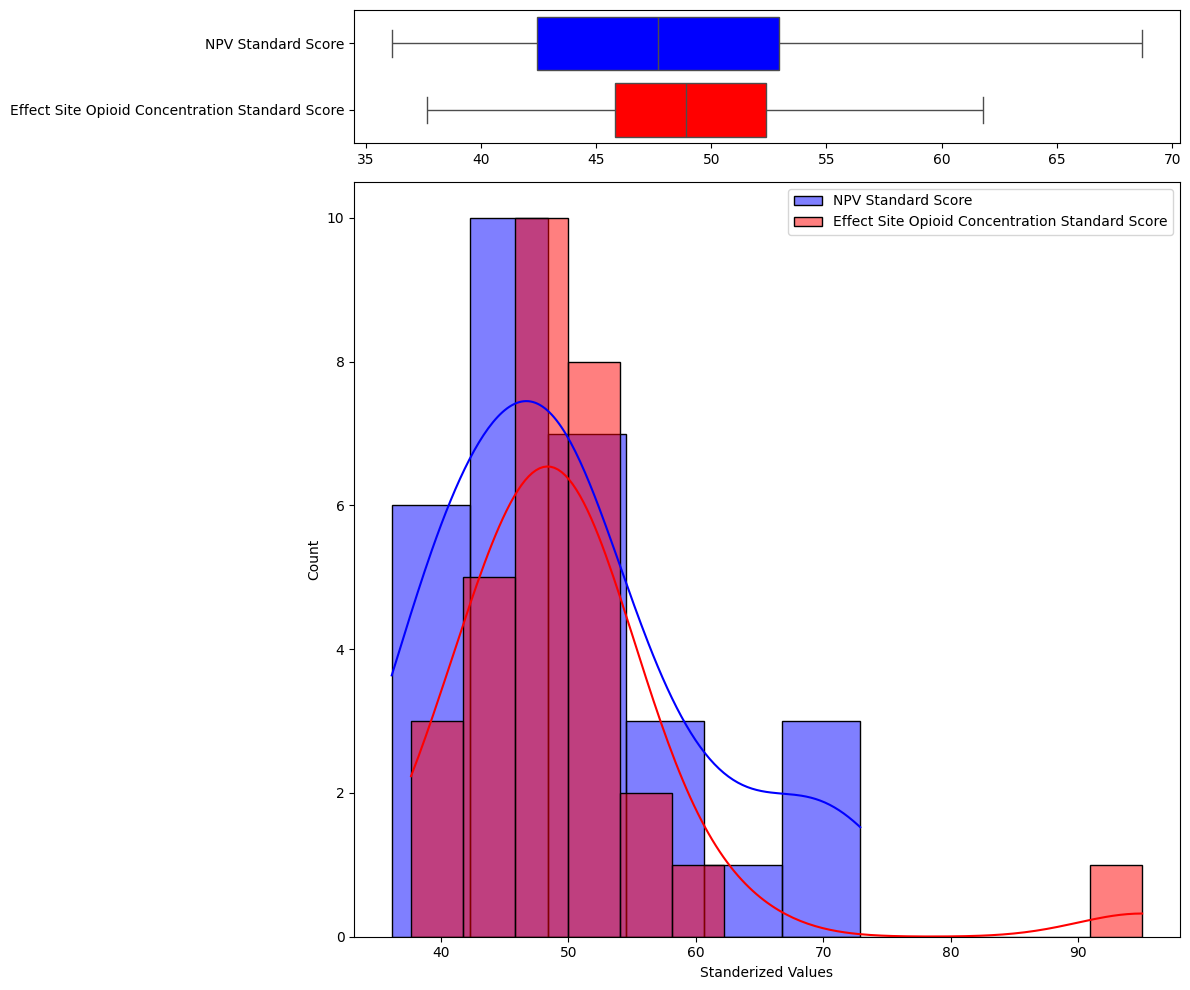

In [10]:
import seaborn as sns

# Set colors for the boxplots
colors = ['blue', 'red']

# Create a figure with two subplots (one for boxplots, one for histograms)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={"height_ratios": (.15, .85)})

# Boxplots on top with specified colors and transparency
sns.boxplot(data=npv_df[['endPI_standard_score', 'opioid_standard_score']], orient='h', ax=axes[0], palette=colors, showfliers=False, saturation=1.0)
axes[0].set(yticklabels=['NPV Standard Score', 'Effect Site Opioid Concentration Standard Score'], xlabel="")

# Histograms below with specified colors and transparency
sns.histplot(data=npv_df, x='endPI_standard_score', ax=axes[1], color='blue', kde=True, label='NPV Standard Score', alpha=0.5)
sns.histplot(data=npv_df, x='opioid_standard_score', ax=axes[1], color='red', kde=True, label='Effect Site Opioid Concentration Standard Score', alpha=0.5)

axes[1].set(ylabel='Count')
axes[1].set(xlabel='Standerized Values')

axes[1].legend()
plt.tight_layout()
plt.show()

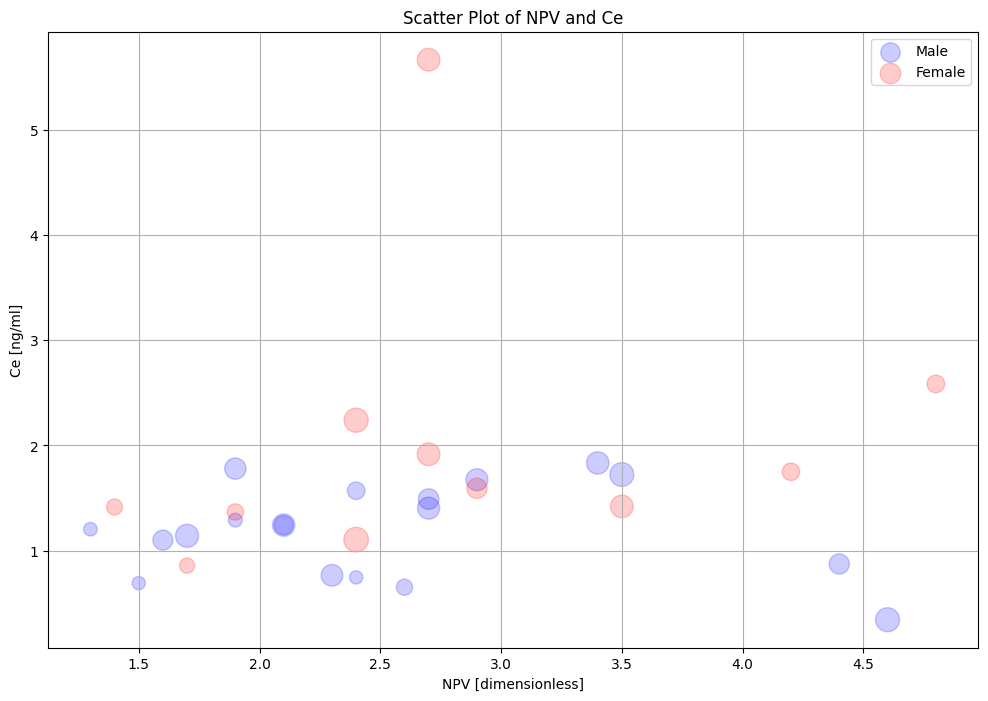

In [11]:
import matplotlib.pyplot as plt

# Filter data by gender
male_data = npv_df[npv_df['female'] == 0]
female_data = npv_df[npv_df['female'] == 1]

# Plot with marker set to 'x' for both male and female data
plt.figure(figsize=(12, 8))
plt.scatter(male_data['endPI'], male_data['opioid1:0.5'], s=4*male_data['age'], c='blue', alpha=0.2, marker='o', label='Male')
plt.scatter(female_data['endPI'], female_data['opioid1:0.5'], s=4*female_data['age'], c='red', alpha=0.2, marker='o', label='Female')

# Titles and labels
plt.title('Scatter Plot of NPV and Ce')
plt.xlabel('NPV [dimensionless]')
plt.ylabel('Ce [ng/ml]')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
len(npv_df)

30

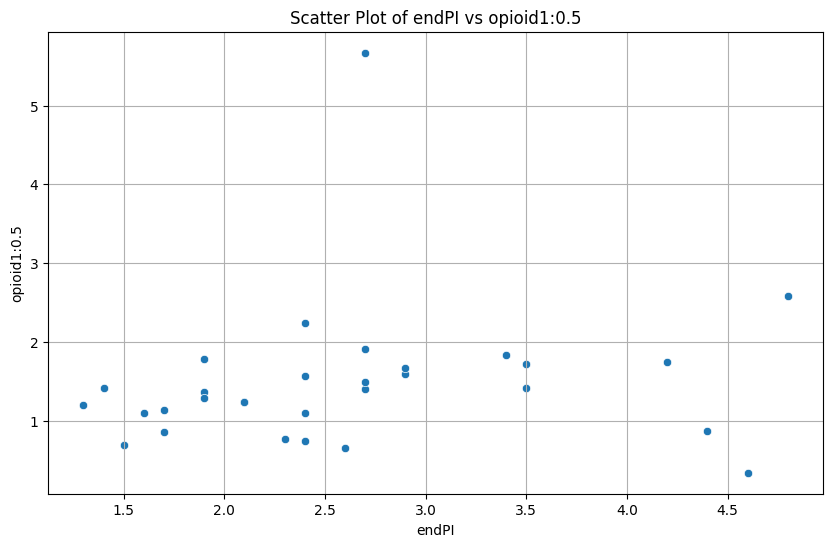

Correlation coefficient: 0.13832942091023934
Critical value (Chi-square distribution, 95.0%): 5.991464547107979
Number of outliers: 0


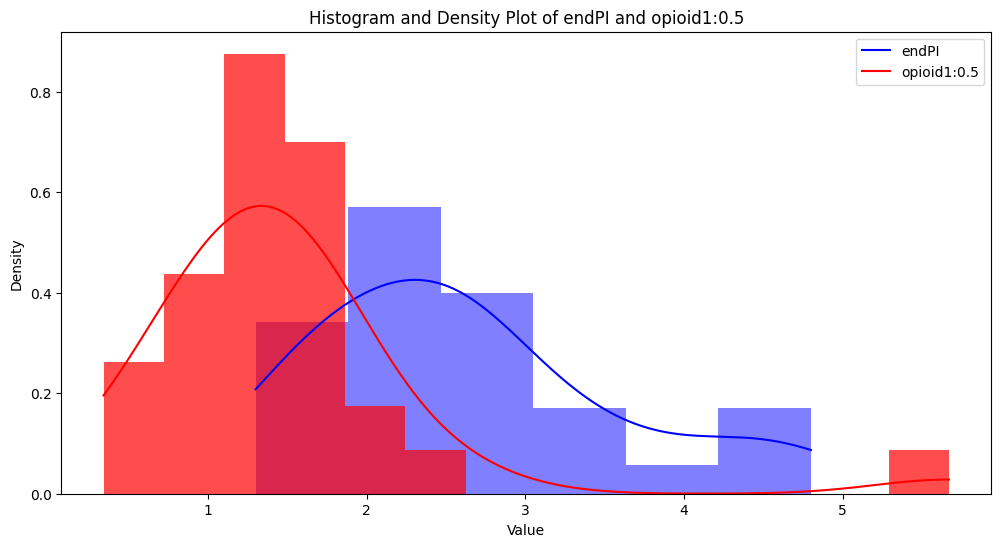

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# 相関関係の検討
# 相関係数の計算
endPI = df['endPI']
opioid = df['opioid1:0.5']
correlation = endPI.corr(opioid)

# 散布図の描画
plt.figure(figsize=(10, 6))
sns.scatterplot(x=endPI, y=opioid)
plt.title('Scatter Plot of endPI vs opioid1:0.5')
plt.xlabel('endPI')
plt.ylabel('opioid1:0.5')
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {correlation}")

# マハラノビス距離による多変量外れ値の検出
data = df[['endPI', 'opioid1:0.5']].dropna()
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean = np.mean(data, axis=0)

# マハラノビス距離の計算
mahalanobis_distances = data.apply(lambda row: mahalanobis(row, mean, inv_cov_matrix), axis=1)
data['Mahalanobis'] = mahalanobis_distances

# 外れ値の特定
confidence_level = 0.95
degrees_of_freedom = data.shape[1] - 1
critical_value = chi2.ppf(confidence_level, degrees_of_freedom)
outliers = data[data['Mahalanobis'] > critical_value]

print(f"Critical value (Chi-square distribution, {confidence_level * 100}%): {critical_value}")
print(f"Number of outliers: {outliers.shape[0]}")

# ヒストグラムとカーネル密度推定曲線の描画
plt.figure(figsize=(12, 6))

# endPIのヒストグラムとKDE
sns.histplot(df['endPI'], color="blue", kde=True, stat="density", linewidth=0)
plt.title('Histogram and Density Plot of endPI and opioid1:0.5')
plt.xlabel('Value')
plt.ylabel('Density')

# opioid1:0.5のヒストグラムとKDE
sns.histplot(df['opioid1:0.5'], color="red", kde=True, stat="density", linewidth=0, alpha=0.7)

plt.legend(['endPI', 'opioid1:0.5'])
plt.show()

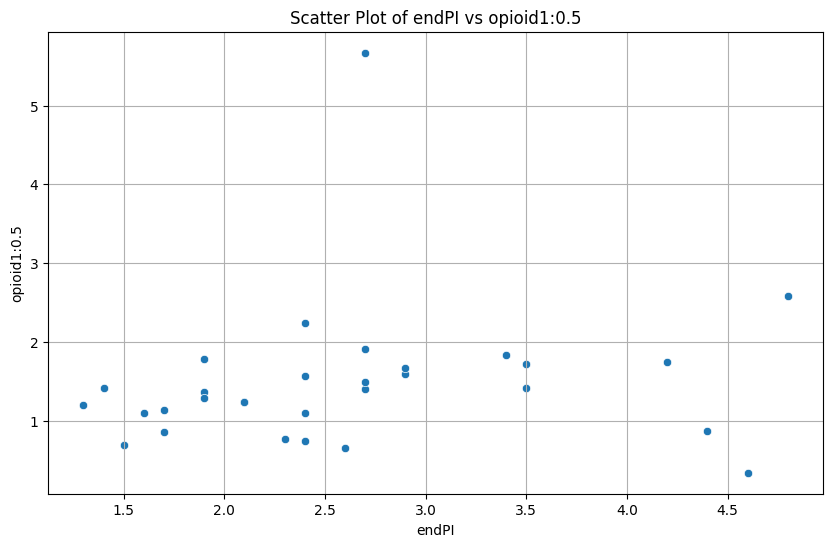

Correlation coefficient: 0.13832942091023934
Critical value (Chi-square distribution, 95.0%): 5.991464547107979
Number of outliers: 0


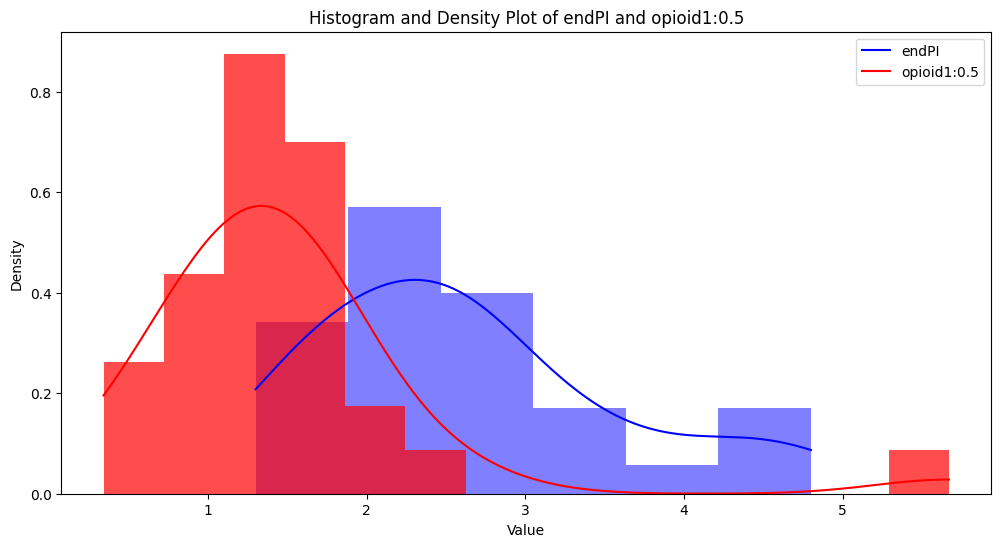

Coefficient of Variation for endPI: 36.33946111454811%
Coefficient of Variation for opioid1:0.5: 62.35760348785199%


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# 相関関係の検討
endPI = df['endPI']
opioid = df['opioid1:0.5']
correlation = endPI.corr(opioid)

# 散布図の描画
plt.figure(figsize=(10, 6))
sns.scatterplot(x=endPI, y=opioid)
plt.title('Scatter Plot of endPI vs opioid1:0.5')
plt.xlabel('endPI')
plt.ylabel('opioid1:0.5')
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {correlation}")

# マハラノビス距離による多変量外れ値の検出
data = df[['endPI', 'opioid1:0.5']].dropna()
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean = np.mean(data, axis=0)

# マハラノビス距離の計算
mahalanobis_distances = data.apply(lambda row: mahalanobis(row, mean, inv_cov_matrix), axis=1)
data['Mahalanobis'] = mahalanobis_distances

# 外れ値の特定
confidence_level = 0.95
degrees_of_freedom = data.shape[1] - 1
critical_value = chi2.ppf(confidence_level, degrees_of_freedom)
outliers = data[data['Mahalanobis'] > critical_value]

print(f"Critical value (Chi-square distribution, {confidence_level * 100}%): {critical_value}")
print(f"Number of outliers: {outliers.shape[0]}")

# ヒストグラムとカーネル密度推定曲線の描画
plt.figure(figsize=(12, 6))

# endPIのヒストグラムとKDE
sns.histplot(df['endPI'], color="blue", kde=True, stat="density", linewidth=0)
plt.title('Histogram and Density Plot of endPI and opioid1:0.5')
plt.xlabel('Value')
plt.ylabel('Density')

# opioid1:0.5のヒストグラムとKDE
sns.histplot(df['opioid1:0.5'], color="red", kde=True, stat="density", linewidth=0, alpha=0.7)

plt.legend(['endPI', 'opioid1:0.5'])
plt.show()

# 変動係数の計算
cv_endPI = (df['endPI'].std() / df['endPI'].mean()) * 100
cv_opioid = (df['opioid1:0.5'].std() / df['opioid1:0.5'].mean()) * 100

print(f"Coefficient of Variation for endPI: {cv_endPI}%")
print(f"Coefficient of Variation for opioid1:0.5: {cv_opioid}%")

In [15]:
import pandas as pd
from scipy import stats

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出
endPI = df['endPI'].dropna()
opioid = df['opioid1:0.5'].dropna()

# フィッシャーのF検定（分散の等質性検定）
f_value, p_value_f = stats.levene(endPI, opioid)

# t検定またはウェルチのt検定（平均値の差異検定）
if p_value_f > 0.05:
    # 分散が等しいと仮定
    t_value, p_value_t = stats.ttest_ind(endPI, opioid, equal_var=True)
else:
    # 分散が等しくないと仮定
    t_value, p_value_t = stats.ttest_ind(endPI, opioid, equal_var=False)

print(f"F検定: F値 = {f_value}, p値 = {p_value_f}")
print(f"t検定: t値 = {t_value}, p値 = {p_value_t}")

F検定: F値 = 1.1458847972232002, p値 = 0.2888467743420902
t検定: t値 = 4.655645686600079, p値 = 1.925193805708693e-05


endPI: 95% CI = ConfidenceInterval(low=29.311719951050087, high=44.08134535996114)
opioid1:0.5: 95% CI = ConfidenceInterval(low=32.33099880300547, high=89.72093296144426)


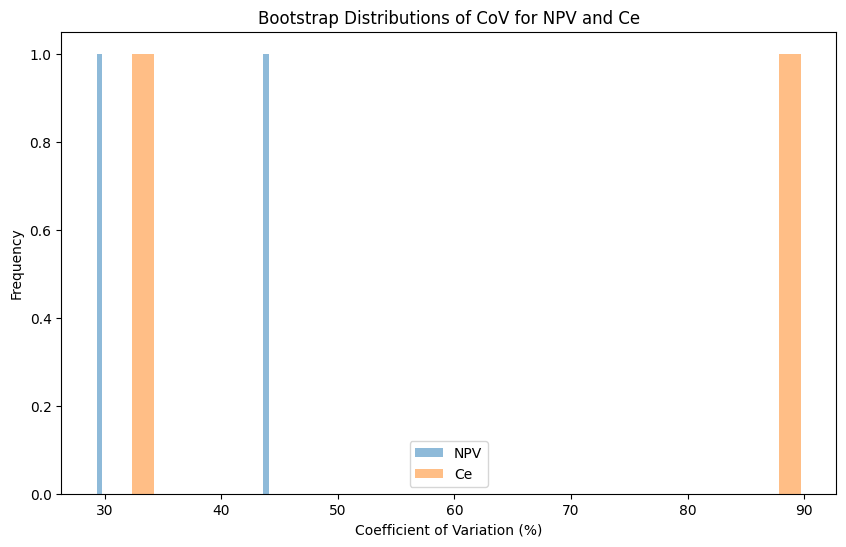

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出
endPI = df['endPI'].dropna()
opioid = df['opioid1:0.5'].dropna()

# 変動係数を計算する関数
def calc_cv(data):
    return np.std(data) / np.mean(data) * 100

# ブートストラップ
n_bootstraps = 1000
bootstrap_results_endPI = bootstrap((endPI,), calc_cv, n_resamples=n_bootstraps)
bootstrap_results_opioid = bootstrap((opioid,), calc_cv, n_resamples=n_bootstraps)

# 信頼区間の計算
cv_ci_endPI = bootstrap_results_endPI.confidence_interval
cv_ci_opioid = bootstrap_results_opioid.confidence_interval

# 結果の出力
print(f"endPI: 95% CI = {cv_ci_endPI}")
print(f"opioid1:0.5: 95% CI = {cv_ci_opioid}")

# ブートストラップ結果の可視化
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_results_endPI.confidence_interval, bins=30, alpha=0.5, label='NPV')
plt.hist(bootstrap_results_opioid.confidence_interval, bins=30, alpha=0.5, label='Ce')
plt.xlabel('Coefficient of Variation (%)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distributions of CoV for NPV and Ce')
plt.legend()

plt.show()

ブートストラップ法による変動係数（Coefficient of Variation, CV）の分布の可視化を解釈する際には、以下の点に注意します：

分布の位置: 分布がどの位置にあるかは、変動係数の中央値や平均値を示します。分布が右にある方が、その変数の相対的な変動性が高いことを意味します。

分布の幅: 分布の広がり方は、ブートストラップによる変動係数の推定の不確実性を示します。広がりが大きいほど、推定の不確実性が大きいことを意味します。

分布の重なり: 二つの分布がどれだけ重なっているかは、両変数の変動係数が統計的に有意に異なるかどうかの手がかりになります。重なりが少ないほど、変動係数に差がある可能性が高くなります。

平均値と中央値: 「opioid1:0.5」の変動係数の平均値と中央値は「endPI」よりも高く、相対的な変動が大きいことを示しています。

信頼区間: 「endPI」の信頼区間は比較的狭く、変動係数の推定が安定していることを示しています。一方で、「opioid1:0.5」の信頼区間は広く、変動係数の推定に大きな不確実性があることがわかります。

分布の重なり: 信頼区間が重なっている部分がありますが、中心値の差異は明らかです。これは、「opioid1:0.5」の方が「endPI」よりも変動性が高いことを示唆しています。

これらの結果から、「endPI」と「opioid1:0.5」の変動係数には統計的に有意な差がある可能性が高いと言えます。ただし、ブートストラップに基づく結果はあくまで推定であり、データの特性やサンプルサイズに影響されるため、注意深く解釈する必要があります。​

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出
endPI = df['endPI'].dropna()
opioid = df['opioid1:0.5'].dropna()

# ブートストラップサンプルの生成
n_bootstraps = 1000
bootstrap_samples_endPI = np.random.choice(endPI, size=(n_bootstraps, len(endPI)))
bootstrap_samples_opioid = np.random.choice(opioid, size=(n_bootstraps, len(opioid)))

# 各サンプルの変動係数を計算
cv_samples_endPI = np.std(bootstrap_samples_endPI, axis=1) / np.mean(bootstrap_samples_endPI, axis=1) * 100
cv_samples_opioid = np.std(bootstrap_samples_opioid, axis=1) / np.mean(bootstrap_samples_opioid, axis=1) * 100

# 変動係数のデータフレームを作成
cv_data = pd.DataFrame({
    'endPI': cv_samples_endPI,
    'opioid1:0.5': cv_samples_opioid
})

# 熱地図の描画
plt.figure(figsize=(8, 6))
sns.heatmap(cv_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Coefficient of Variation')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出と変動係数の計算
cv_endPI = np.std(df['endPI']) / np.mean(df['endPI']) * 100
cv_opioid = np.std(df['opioid1:0.5']) / np.mean(df['opioid1:0.5']) * 100

# 棒グラフの描画
plt.bar(['endPI', 'opioid1:0.5'], [cv_endPI, cv_opioid])
plt.ylabel('Coefficient of Variation (%)')
plt.title('CV Comparison')
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出と変動係数の計算
cv_endPI = np.std(df['endPI']) / np.mean(df['endPI']) * 100
cv_opioid = np.std(df['opioid1:0.5']) / np.mean(df['opioid1:0.5']) * 100

# データフレームの作成
cv_values = [cv_endPI, cv_opioid]
variables = ['endPI', 'opioid1:0.5']
df_cv = pd.DataFrame({'Variable': variables, 'CV': cv_values})

# ドットプロットの描画
sns.pointplot(x='Variable', y='CV', data=df_cv)
plt.ylabel('Coefficient of Variation (%)')
plt.title('Dot Plot of CV')
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出と変動係数の計算
cv_endPI = np.std(df['endPI']) / np.mean(df['endPI']) * 100
cv_opioid = np.std(df['opioid1:0.5']) / np.mean(df['opioid1:0.5']) * 100

# ラダープロットは2つの変数間の比較にはあまり適していないが、例として示す
plt.plot(['endPI', 'opioid1:0.5'], [cv_endPI, cv_opioid], marker='o')
plt.ylabel('Coefficient of Variation (%)')
plt.title('Ladder Plot of CV')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ファイルの読み込み
file_path = r'C:\Users\bougt\npv_2023_.csv'  # ファイルパスを適宜変更してください
df = pd.read_csv(file_path)

# データの抽出
endPI = df['endPI'].dropna()
opioid = df['opioid1:0.5'].dropna()

# ブートストラップサンプルの生成
n_bootstraps = 1000
bootstrap_samples_endPI = np.random.choice(endPI, size=(n_bootstraps, len(endPI)))
bootstrap_samples_opioid = np.random.choice(opioid, size=(n_bootstraps, len(opioid)))

# 各サンプルの変動係数を計算
cv_samples_endPI = np.std(bootstrap_samples_endPI, axis=1) / np.mean(bootstrap_samples_endPI, axis=1) * 100
cv_samples_opioid = np.std(bootstrap_samples_opioid, axis=1) / np.mean(bootstrap_samples_opioid, axis=1) * 100

# 変動係数のデータフレームを作成
cv_data = pd.DataFrame({
    'endPI': cv_samples_endPI,
    'opioid1:0.5': cv_samples_opioid
})

# ボックスプロットの描画（外れ値を表示しない）
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_data, showfliers=False)
plt.ylabel('Coefficient of Variation (%)')
plt.title('Box Plot of Coefficient of Variation for endPI and opioid1:0.5')
plt.show()

臨床的意義

妥当性の評価

NPV vs Ce

In [ ]:
table = pd.read_excel(r'C:\Users\bougt\npv_profile.xlsx')

table.head()

In [ ]:
table.columns

In [ ]:
# 時間として扱う列の変換
time_columns = ['room_start', 'room_end', 'ane_start', 'ane_end', 'ope_start', 'ope_end']

# 時刻列をdatetime型に変換
for col in time_columns:
    table[col] = pd.to_datetime(table[col], format='%H:%M:%S', errors='coerce')

# 新しい計算列の追加
table['ope_to_ane_end'] = table['ane_end'] - table['ope_end']
table['ane_end_to_discharge'] = table['room_end'] - table['ane_end']

duration_columns = ['room_time', 'ane_time', 'ope_time', 'ope_to_ane_end', 'ane_end_to_discharge']

# duration_columns の各列を文字列型に変換し、その後 timedelta 型に変換
for col in duration_columns:
    table[col] = pd.to_timedelta(table[col].astype(str), errors='coerce')

# duration_columns の各列を分単位の数値に変換し、元の列を上書き
for col in duration_columns:
    table[col] = table[col].dt.total_seconds() // 60

# serous 列の計算
table['serous'] = table['fluid'] - table['colloid']

# serous 列の計算
table['serous'] = table['fluid'] - table['colloid']

# 結果の表示
table.head()

In [ ]:
table.columns

In [ ]:
table['disease'].value_counts()

In [ ]:
# 病名のリストをカンマで分割
split_disease = table['disease'].str.split(',')

# 分割された病名をフラットなリストに変換
flat_disease_list = [item.strip() for sublist in split_disease for item in sublist]

# ユニークな病名を抽出
unique_diseases = set(flat_disease_list)

# 結果の表示
print(unique_diseases)

In [ ]:
from collections import Counter

# 病名の出現回数をカウント
disease_counts = Counter(flat_disease_list)

# 結果の表示
print(disease_counts)

In [ ]:
table['procedure'].value_counts()

In [ ]:
# 病名のリストをカンマで分割
split_procedure = table['procedure'].str.split(',')

# 分割された病名をフラットなリストに変換
flat_procedure_list = [item.strip() for sublist in split_procedure for item in sublist]

# ユニークな病名を抽出
unique_procedure = set(flat_procedure_list)

# 結果の表示
print(unique_procedure)

In [ ]:
# 病名の出現回数をカウント
procedure_counts = Counter(flat_procedure_list)

# 結果の表示
print(procedure_counts)

In [ ]:
from tableone import TableOne

# 変数リスト（調べたい変数の名前）
columns = ['male', 'age', 'height', 'weight', 'bmi', 'ASA', 
           'room_time', 'ane_time', 'ope_time', 'ope_to_ane_end', 'ane_end_to_discharge', 
           'fenta', 'remi', 'fluid', 'colloid', 'serous', 
          ]

# カテゴリー変数リスト（カテゴリー変数の名前）
categorical = ['male', 'ASA', ]

# グループ化のための変数（比較したいグループがあれば）
groupby = ''

# 非正規分布変数リスト（非正規分布の連続変数の名前）
nonnormal = ['fenta', 'remi', 'fluid', 'colloid', 'serous', 
            ]

# Table 1 の作成
table_one = TableOne(table, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, pval=False, overall = False)

# Table 1 の表示
print(table_one.tabulate(tablefmt="pipe"))